In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
heartdata = pd.read_csv('selected_heartdata.csv')
heartdata.head()

,HeartDisease,GenHealth,Stroke,DiffWalking,AgeCategory,PhysicalHealth
0,0,3,0,0,5,3.0
1,0,3,1,0,0,0.0
2,0,2,0,0,1,0.0
3,0,1,0,0,0,0.0
4,0,2,0,1,3,0.0


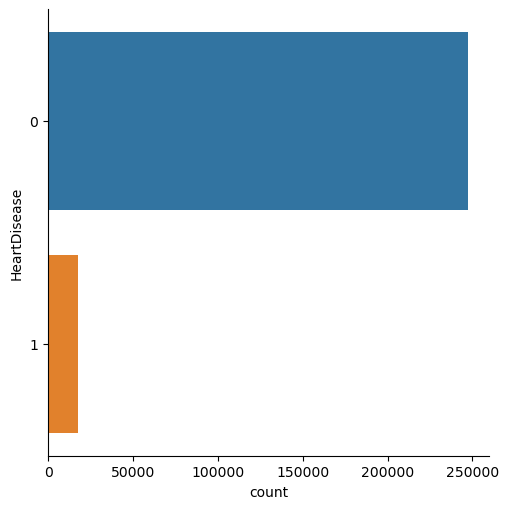

In [3]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [4]:
y = heartdata["HeartDisease"]
X = heartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [5]:
def KNNClass(X_train, X_test, y_train, y_test, knn):
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
    cmTest = confusion_matrix(y_test, y_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Train :\t", (tnTest/(tnTest + fpTest)))
    print()

    print("FPR Train :\t", (fpTest/(tnTest + fpTest)))
    print("FNR Train :\t", (fnTest/(tpTest + fnTest)))

    sb.heatmap(confusion_matrix(y_test, y_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    
    print(classification_report(y_test, y_pred))
    return y_pred

# Unbalanced Dataset 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.93
TPR Train :	 0.0676056338028169
TNR Train :	 0.9887043726748261

FPR Train :	 0.011295627325173883
FNR Train :	 0.9323943661971831
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     74188
           1       0.30      0.07      0.11      5325

    accuracy                           0.93     79513
   macro avg       0.62      0.53      0.54     79513
weighted avg       0.89      0.93      0.90     79513



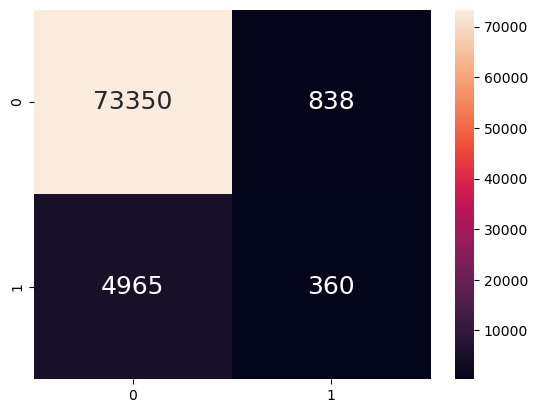

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = KNNClass(X_train, X_test, y_train, y_test,knn)

# Balanced Dataset results

In [8]:
balancedheartdata = pd.read_csv('balanced_heartdata.csv')

In [9]:
y_under = balancedheartdata["HeartDisease"]
X_under = balancedheartdata[["GenHealth","DiffWalking","Stroke","PhysicalHealth","AgeCategory"]]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.3, random_state=0)

Accuracy of logistic regression classifier on test set: 0.67
TPR Train :	 0.7359539789069991
TNR Train :	 0.6062205466540999

FPR Train :	 0.3937794533459001
FNR Train :	 0.26404602109300096
              precision    recall  f1-score   support

           0       0.70      0.61      0.65      5305
           1       0.65      0.74      0.69      5215

    accuracy                           0.67     10520
   macro avg       0.67      0.67      0.67     10520
weighted avg       0.67      0.67      0.67     10520



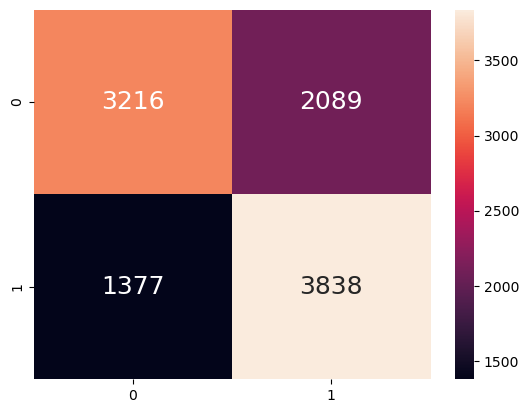

In [11]:
knn = KNeighborsClassifier(n_neighbors=3)
y_pred_under = KNNClass(X_train, X_test, y_train, y_test,knn)

## Gridsearch to find the correct parameters

In [28]:
param_grid = {
    'n_neighbors': [7, 10, 12, 15],          # Number of neighbors
    'weights': ['uniform', 'distance'],# Weighting function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm
    'leaf_size': [5, 10, 15],          # Leaf size for ball tree or KD tree
    'p': [1, 2]                         # Power parameter for the Minkowski distance
}

In [29]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15],
                         'n_neighbors': [7, 10, 12, 15], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [31]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8059443911792905
TNR Train :	 0.666540999057493

FPR Train :	 0.3334590009425071
FNR Train :	 0.1940556088207095
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      5305
           1       0.70      0.81      0.75      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.73     10520
weighted avg       0.74      0.74      0.73     10520



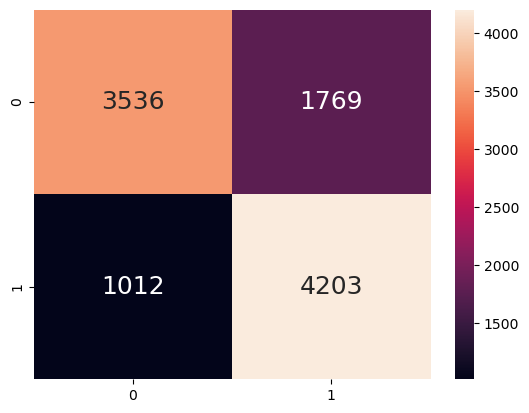

In [22]:
knn = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree', leaf_size=5,p=1,weights='uniform')
y_pred_under = KNNClass(X_train, X_test, y_train, y_test,knn)

### GridSearch fine tuning to further narrow the exact parameters

In [32]:
param_grid = {
    'n_neighbors': [ 14, 15, 16, 17],          # Number of neighbors
    'weights': ['uniform', 'distance'],# Weighting function
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm
    'leaf_size':[3, 5, 7],          # Leaf size for ball tree or KD tree
    'p': [1, 2]                         # Power parameter for the Minkowski distance
}

In [38]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,scoring="accuracy")

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 5, 7],
                         'n_neighbors': [14, 15, 16, 17], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [40]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 3, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8059443911792905
TNR Train :	 0.666540999057493

FPR Train :	 0.3334590009425071
FNR Train :	 0.1940556088207095
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      5305
           1       0.70      0.81      0.75      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.73     10520
weighted avg       0.74      0.74      0.73     10520



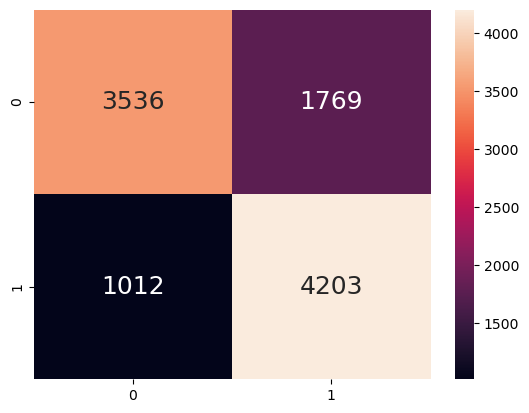

In [27]:
knn = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree', leaf_size=3,p=1,weights='uniform')
y_pred_under = KNNClass(X_train, X_test, y_train, y_test,knn)

### Gridsearch recall scoring test

In [36]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1,scoring='recall')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}


Accuracy of logistic regression classifier on test set: 0.74
TPR Train :	 0.8059443911792905
TNR Train :	 0.666540999057493

FPR Train :	 0.3334590009425071
FNR Train :	 0.1940556088207095
              precision    recall  f1-score   support

           0       0.78      0.67      0.72      5305
           1       0.70      0.81      0.75      5215

    accuracy                           0.74     10520
   macro avg       0.74      0.74      0.73     10520
weighted avg       0.74      0.74      0.73     10520



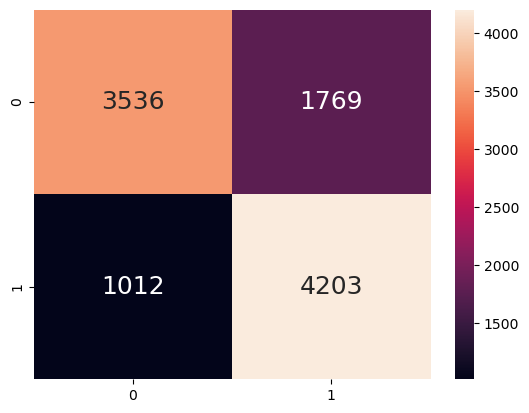

In [37]:
knn = KNeighborsClassifier(n_neighbors=15, algorithm='ball_tree', leaf_size=5 ,p=1,weights='uniform')
y_pred_under = KNNClass(X_train, X_test, y_train, y_test,knn)

Froom the results of all the gridsearch it is evident that the model is much better after fine tuning with the optimal parameters through gridsearch using the balanced dataset.

Further tuning of parameter values yielded no changes in the accuracy precision, recall nor f1 score.